# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [23]:
%config Completer.use_jedi = False

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import scipy.stats
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ 
Why mean and std are appropriate: 
 * The data is continuous
 * We are probably interested in estimating population parameters and sample mean and std are good unbiased estimates of the population mean and standard deviation.
 
Why mean and std __are not__ appropriate: 
 * Data is heavily right-skewed, not symmetrical, and certainly not normal. Therefore the std is not giving a good idea about the spread of this data. The mean is also pulled to the right so maybe median would be a better measure of central tendency.  

In [4]:
6 * 25

150

mean:  13270.42
std:  12110.01
sample size: 1338
note that the median, 9382.033 is far below the mean, and probably a better measure of central tendency


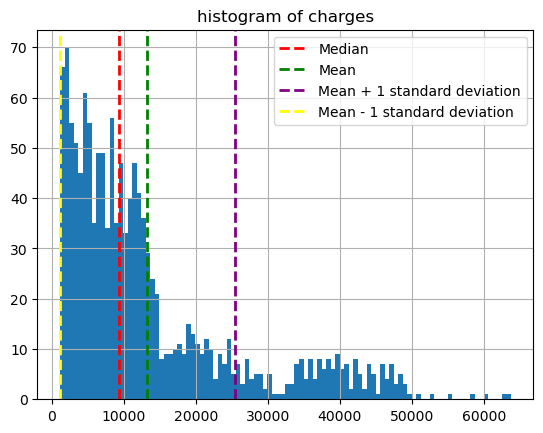

In [22]:
df = medical
median, mean, std = df.charges.median(), df.charges.mean(), df.charges.std()
print('mean: ', round(mean, 2))
print('std: ',  round(std, 2))
print('sample size:', len(df))
print(f'note that the median, {median} is far below the mean, and probably a better measure of central tendency')
df.charges.hist(bins=100)
plt.axvline(median, color='red', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mean, color='green', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mean + std, color='purple', linestyle='dashed', linewidth=2, label='Mean + 1 standard deviation')
plt.axvline(mean - std, color='yellow', linestyle='dashed', linewidth=2, label='Mean - 1 standard deviation')
# plt.text(median, 1, f'Median: {median}', color='red', verticalalignment='bottom')
# plt.text(mean, 2, f'Mean: {mean:.2f}', color='green', verticalalignment='bottom')
plt.legend()
plt.title('histogram of charges');

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Since we have a __large__ random sample that we are assuming are **independent and identically distributed**, The central limit theorem should apply. Therefore our samples mean and standard deviation are good approximations of the population's mean and standard deviation. We should use a **confidence interval estimation** using a t-critical value since the standard deviation of the population is not known. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ A **one-sided interval** is most appropriate becase there is one direction of concern. The administrator is worried that we have fallen below a threshold. If they were concerned that the mean charge had deviated without a concern of direction, we would use a two-sided interval.

In [24]:
n = len(df) # size of sample
sample_std = df.charges.std(ddof=1) # sample std to estimate population std
mean_std = sample_std / np.sqrt(n) # std of the distribution of sample means 
crit_t = t.ppf(.95, df=n) # value where 95 % of the data is to the left
print(f'We are 95% confident that the true mean of hospital charges is above {mean - crit_t * mean_std}')
print('Therefore, we would advise the administrator not to worry.')

We are 95% confident that the true mean of hospital charges is above 12725.487466208931
Therefore, we would advise the administrator not to worry.


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

* pop_A = Set of charges to those with insurance
* pop_B = Set of charges to those without insurance
* A = Our sample of pop_A
* B = Our sample of pop_B

**Null hypothesis**: There is not a significant difference between the means of A and B.

**Alternative hypothesis**: There is a significant difference between the means of A and B.

**Assumptions:** When calculating the pooled standard deviation and t-statistic we are assuming equal variances between A and B. Otherwise, we should use Welch's t-test.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [28]:
df.insuranceclaim.unique()

array([1, 0])

In [43]:
A = df.loc[df['insuranceclaim'] == 1, 'charges']
B = df.loc[df['insuranceclaim'] == 0, 'charges']
na, nb = len(A), len(B)
ma, mb = A.mean(), B.mean()
print(f'Sample sizes \n A: {na}\n B: {nb}')
print(f'Standard deviations\nA: {np.std(A)}\nB: {np.std(B)}')

Sample sizes 
 A: 783
 B: 555
Standard deviations
A: 14036.956250260417
B: 6440.699841605235


In [78]:
sp = np.sqrt(((na - 1) * np.var(A, ddof=1) + (nb - 1) * np.var(B, ddof=1)) / ((na + nb - 2)))
tstat = (ma - mb) / (sp * np.sqrt(1 / na + 1 / nb))
degf = na + nb - 2
print(tstat)
p = t.sf(abs(tstat), df=degf) * 2   
print(f'If pop_A and pop_B have the same mean, the probability that \n\
we see a mean difference as extreme as the one observed is {p}')
print('Therefore, we reject the null hypthesis in favor of the alternative. \n\
We believe there are significant differencs in charges between those with and those without insurance.')

11.893299030876712
If pop_A and pop_B have the same mean, the probability that 
we see a mean difference as extreme as the one observed is 4.461230231620717e-31
Therefore, we reject the null hypthesis in favor of the alternative. 
We believe there are significant differencs in charges between those with and those without insurance.


In [53]:
_tstat, _p = scipy.stats.ttest_ind(A, B)

In [72]:
assert _p == p and tstat == _tstat
print('We got the same results!')

We got the same results!


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ There is not a z-test from a sample. This is because we can only use the z-test when we know the population variance and this is not common.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test